In [48]:
import pandas as pd

# Load the data
df = pd.read_excel('dataset.xlsx')  # Corrected to use read_excel for Excel files

# Display the first few rows
print(df.head())

# Display basic information about the dataset
print(df.info())

   Num                 Timestamp  Current_J0  Temperature_T0  Current_J1  \
0    1  2022-10-26T08:17:21.847Z    0.109628          27.875   -2.024669   
1    2  2022-10-26T08:17:22.852Z    0.595605          27.875   -2.278456   
2    3  2022-10-26T08:17:23.857Z   -0.229474          27.875   -2.800408   
3    4  2022-10-26T08:17:24.863Z    0.065053          27.875   -3.687768   
4    5  2022-10-26T08:17:25.877Z    0.884140          27.875   -2.938830   

   Temperature_J1  Current_J2  Temperature_J2  Current_J3  Temperature_J3  \
0         29.3750   -1.531442         29.3750   -0.998570         32.1250   
1         29.3125   -0.866556         29.4375   -0.206097         32.1875   
2         29.3125   -2.304336         29.4375   -0.351499         32.1250   
3         29.3125   -1.217652         29.4375   -1.209115         32.1250   
4         29.3750   -1.794076         29.4375   -2.356471         32.1875   

   ...      Speed_J0  Speed_J1  Speed_J2  Speed_J3  Speed_J4  Speed_J5  \
0  ...

In [49]:
print(df.isnull().sum())

Num                      0
Timestamp                0
Current_J0              46
Temperature_T0          54
Current_J1              54
Temperature_J1          54
Current_J2              54
Temperature_J2          54
Current_J3              54
Temperature_J3          54
Current_J4              54
Temperature_J4          54
Current_J5              54
Temperature_J5          54
Speed_J0                54
Speed_J1                54
Speed_J2                54
Speed_J3                54
Speed_J4                54
Speed_J5                54
Tool_current            54
cycle                    0
Robot_ProtectiveStop    54
grip_lost                0
dtype: int64


In [50]:
print(df.describe())

               Num   Current_J0  Temperature_T0   Current_J1  Temperature_J1  \
count  7409.000000  7363.000000     7355.000000  7355.000000     7355.000000   
mean   3705.000000    -0.048934       34.906781    -2.297936       37.659636   
std    2138.938405     0.829395        2.762057     0.800450        3.247315   
min       1.000000    -6.247756       27.812500    -5.808734       29.312500   
25%    1853.000000    -0.195026       33.000000    -2.664919       35.375000   
50%    3705.000000    -0.080830       36.500000    -2.236342       39.687500   
75%    5557.000000     0.095959       37.062500    -1.778334       40.125000   
max    7409.000000     6.806938       37.250000     1.083596       40.500000   

        Current_J2  Temperature_J2   Current_J3  Temperature_J3   Current_J4  \
count  7355.000000     7355.000000  7355.000000     7355.000000  7355.000000   
mean     -1.199381       38.064064    -0.605312       40.936999    -0.022968   
std       0.609984        3.311948     

In [51]:
# Remove double quotes from the 'Timestamp' column
df['Timestamp'] = df['Timestamp'].str.strip('"')

# Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Set 'Timestamp' as the index
df.set_index('Timestamp', inplace=True)

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].interpolate(method='time')
df[numerical_cols] = df[numerical_cols].ffill().bfill()

In [65]:
print(df.isnull().sum())


Num                     0
Current_J0              0
Temperature_T0          0
Current_J1              0
Temperature_J1          0
Current_J2              0
Temperature_J2          0
Current_J3              0
Temperature_J3          0
Current_J4              0
Temperature_J4          0
Current_J5              0
Temperature_J5          0
Speed_J0                0
Speed_J1                0
Speed_J2                0
Speed_J3                0
Speed_J4                0
Speed_J5                0
Tool_current            0
cycle                   0
Robot_ProtectiveStop    0
grip_lost               0
timestamp               0
dtype: int64


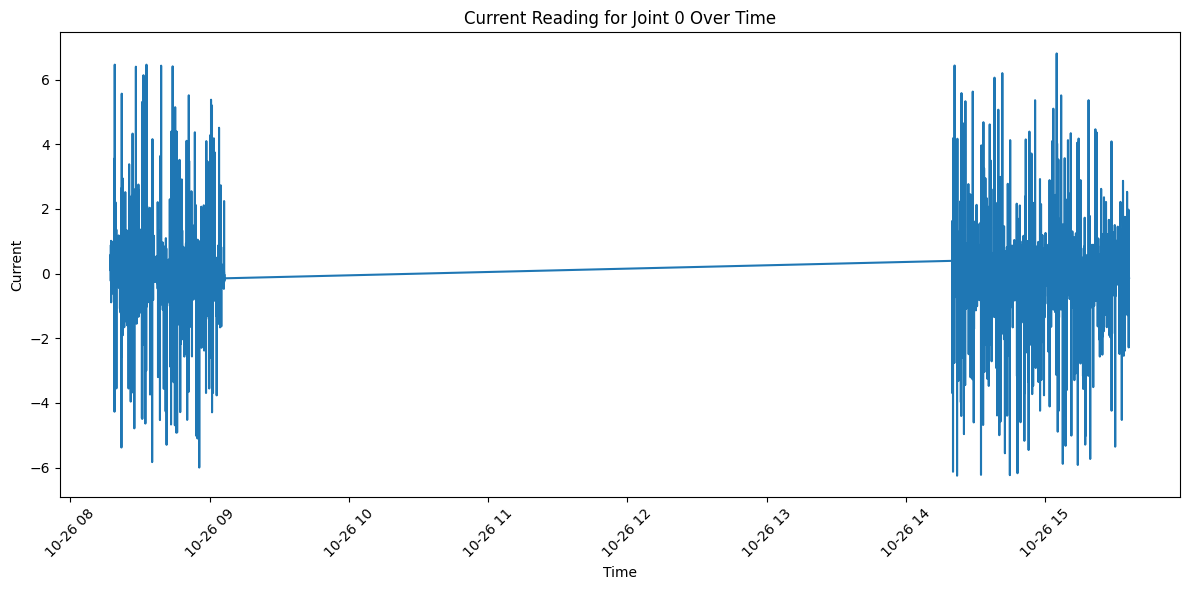

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Current_J0'])
plt.title('Current Reading for Joint 0 Over Time')
plt.xlabel('Time')
plt.ylabel('Current')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

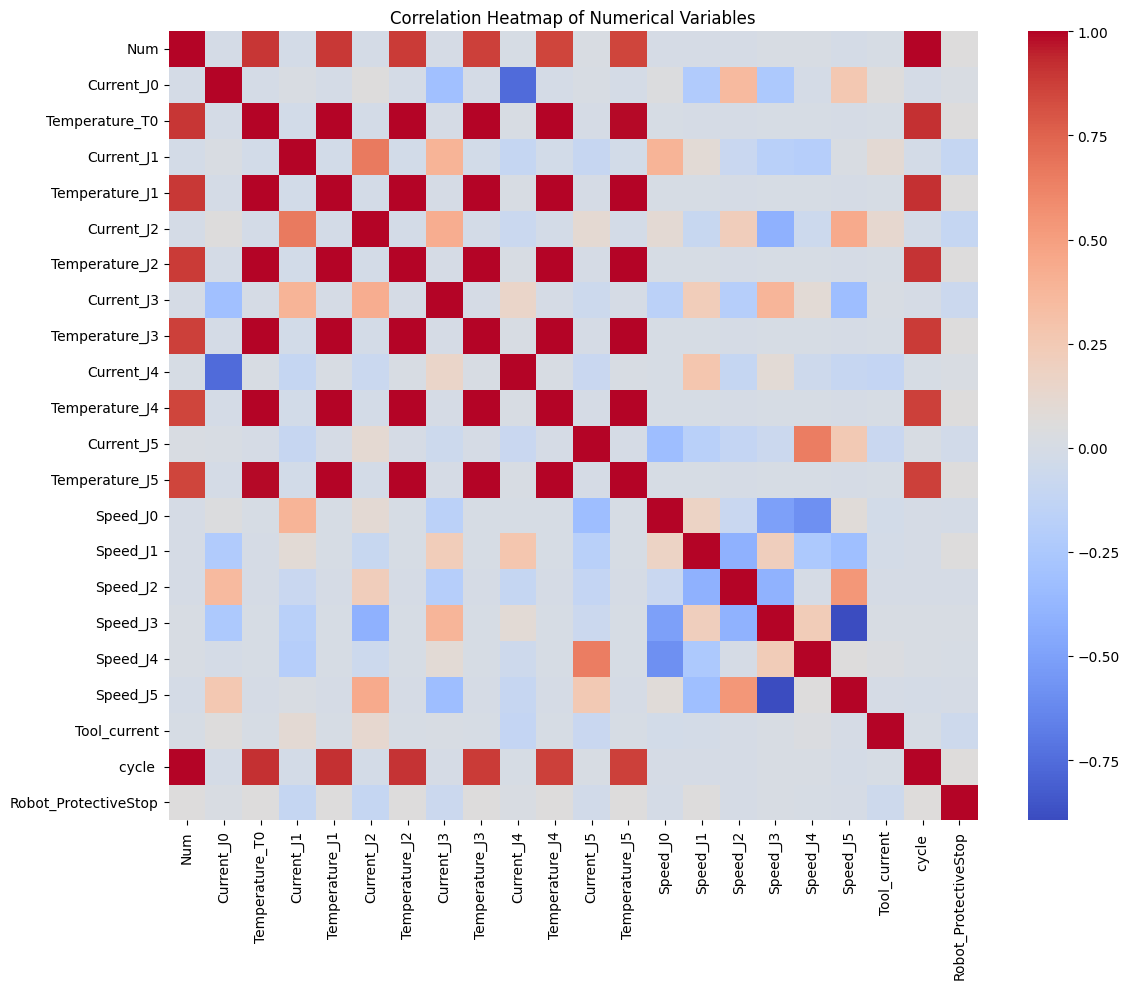

In [54]:
import seaborn as sns

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12,10))
sns.heatmap(df[numeric_cols].corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

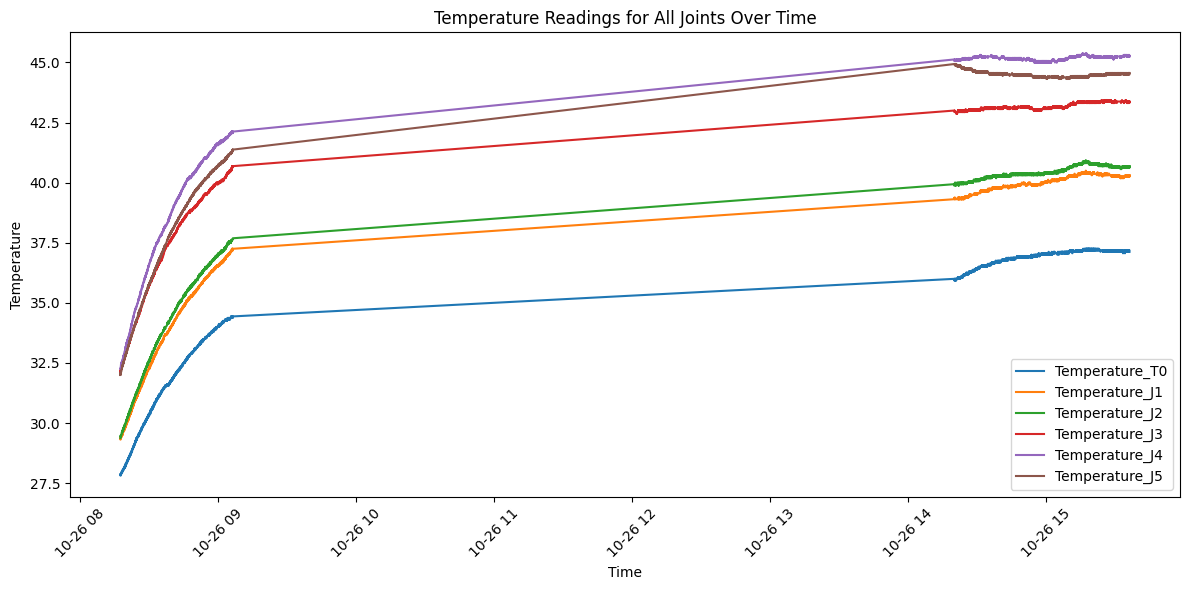

In [55]:
temp_cols = [col for col in df.columns if col.startswith('Temperature')]
plt.figure(figsize=(12,6))
for col in temp_cols:
    plt.plot(df.index, df[col], label=col)
plt.title('Temperature Readings for All Joints Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

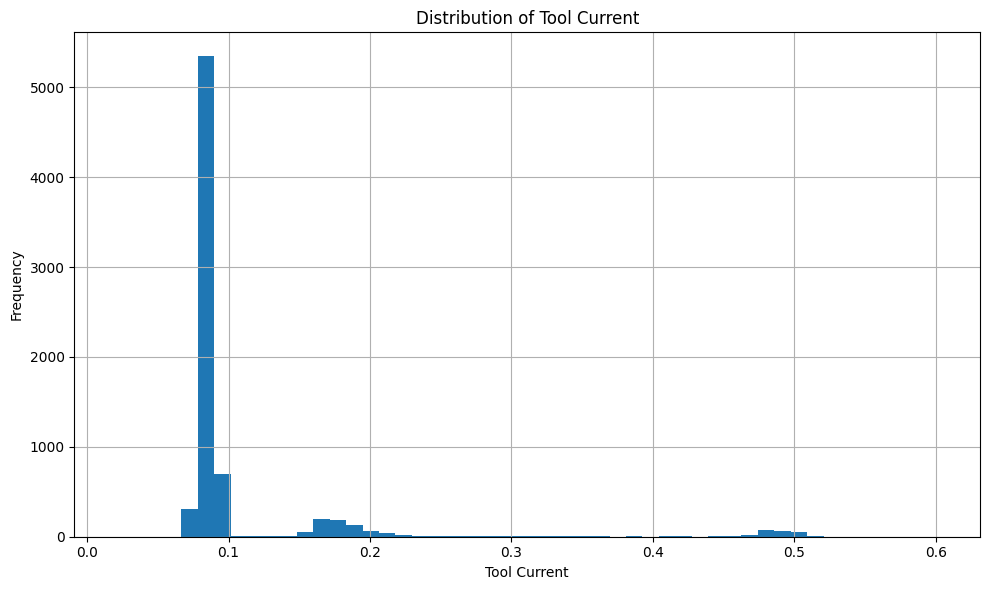

In [56]:
plt.figure(figsize=(10,6))
df['Tool_current'].hist(bins=50)
plt.title('Distribution of Tool Current')
plt.xlabel('Tool Current')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

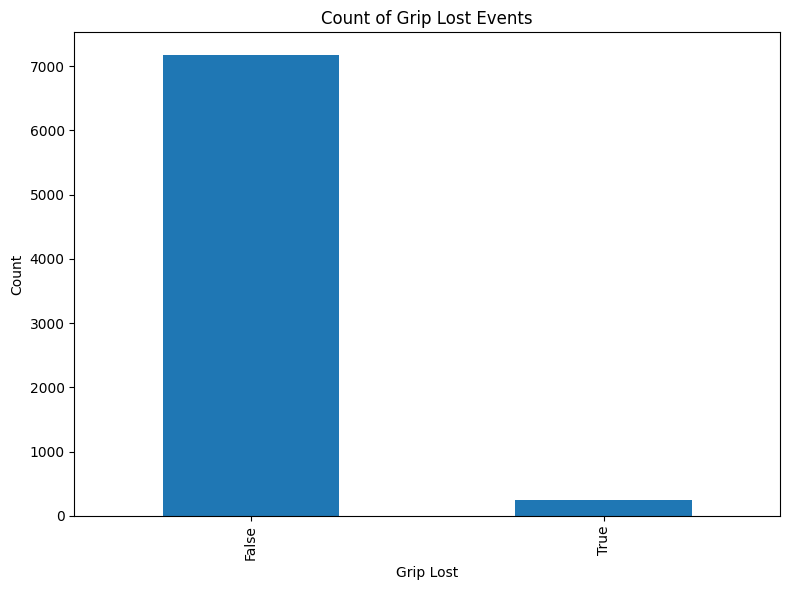

In [57]:
grip_lost_count = df['grip_lost'].value_counts()
plt.figure(figsize=(8,6))
grip_lost_count.plot(kind='bar')
plt.title('Count of Grip Lost Events')
plt.xlabel('Grip Lost')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

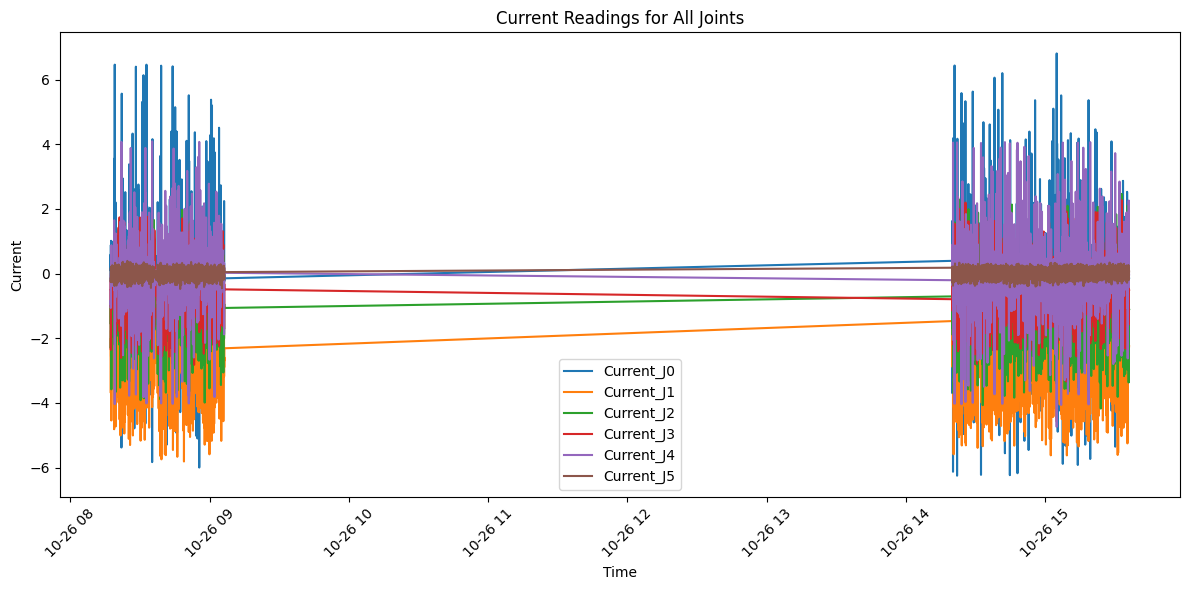

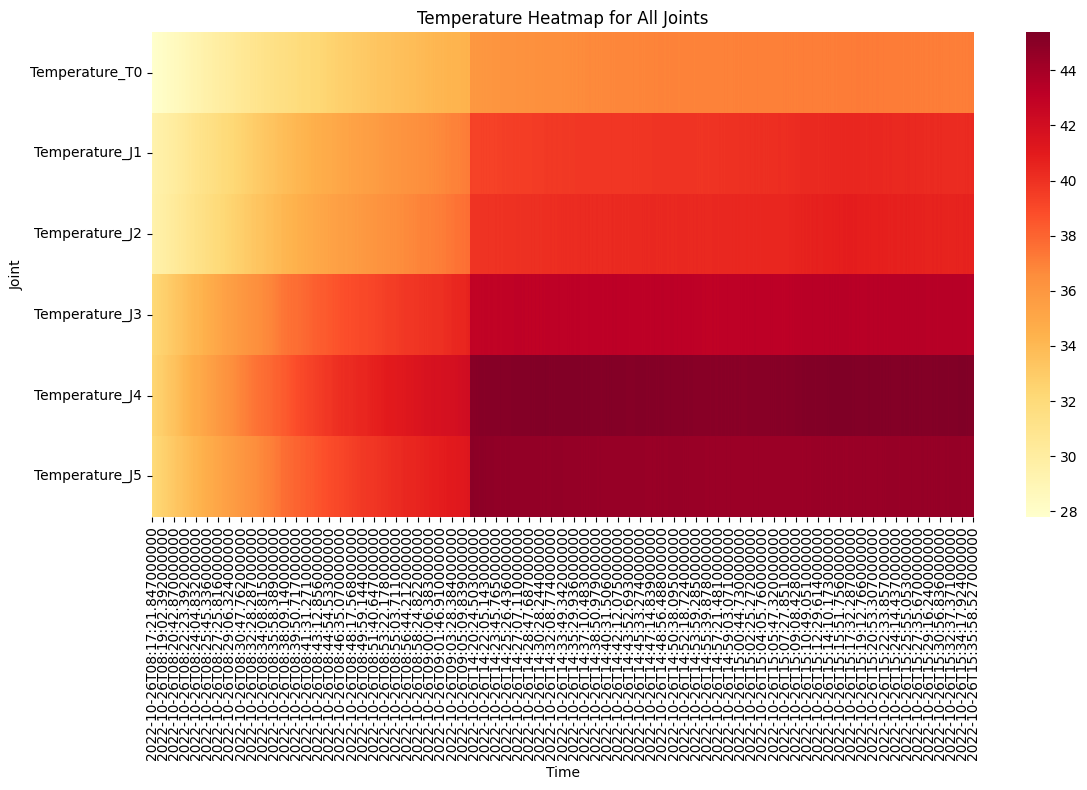

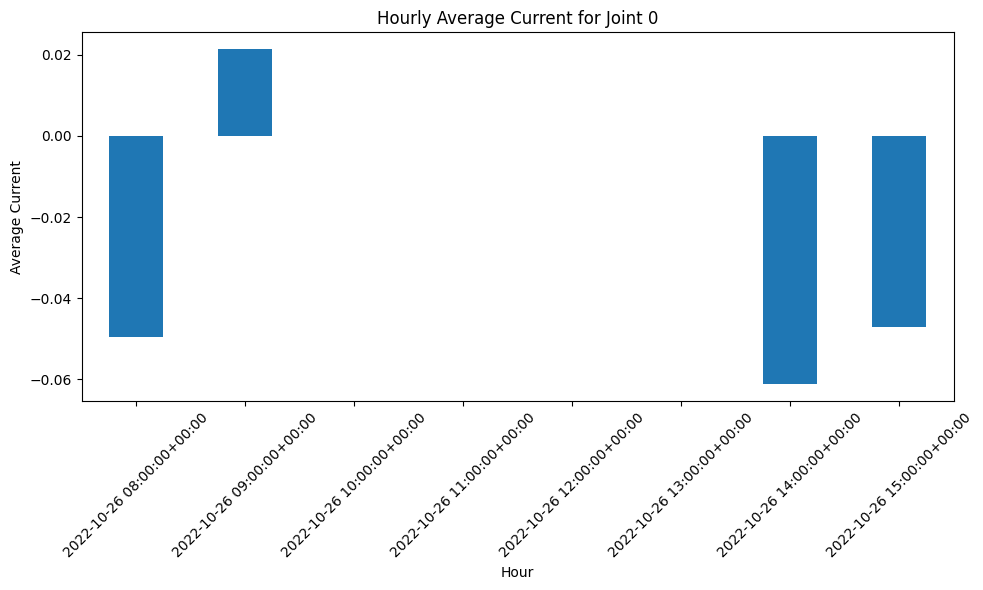

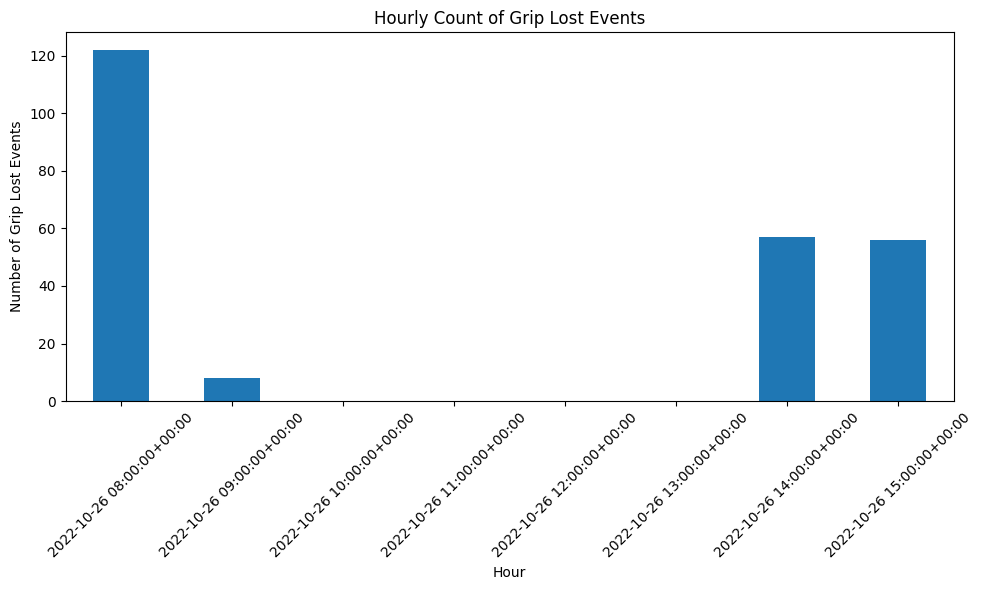

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Line plot of currents for all joints
current_cols = [col for col in df.columns if col.startswith('Current_')]
plt.figure(figsize=(12, 6))
for col in current_cols:
    plt.plot(df.index, df[col], label=col)
plt.title('Current Readings for All Joints')
plt.xlabel('Time')
plt.ylabel('Current')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Heatmap of joint temperatures over time
temp_cols = [col for col in df.columns if col.startswith('Temperature_')]
plt.figure(figsize=(12, 8))
sns.heatmap(df[temp_cols].T, cmap='YlOrRd', xticklabels=100)
plt.title('Temperature Heatmap for All Joints')
plt.xlabel('Time')
plt.ylabel('Joint')
plt.tight_layout()
plt.show()

# 3. Hourly average current for Joint 0
hourly_avg = df['Current_J0'].resample('h').mean()
plt.figure(figsize=(10, 6))
hourly_avg.plot(kind='bar')
plt.title('Hourly Average Current for Joint 0')
plt.xlabel('Hour')
plt.ylabel('Average Current')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Count of grip_lost events by hour
grip_lost_hourly = df['grip_lost'].resample('h').sum()
plt.figure(figsize=(10, 6))
grip_lost_hourly.plot(kind='bar')
plt.title('Hourly Count of Grip Lost Events')
plt.xlabel('Hour')
plt.ylabel('Number of Grip Lost Events')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

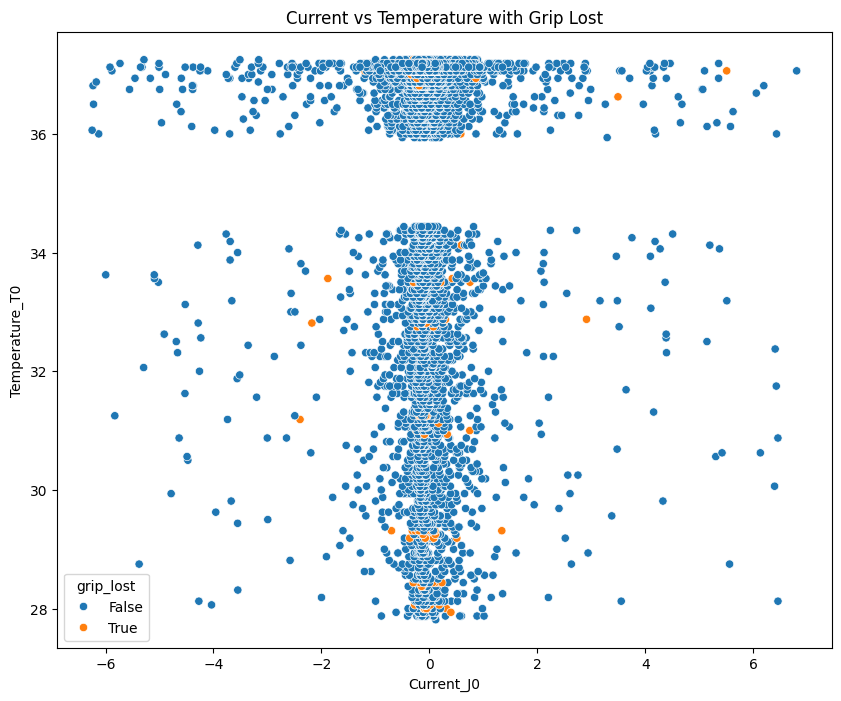

In [59]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Current_J0', y='Temperature_T0', hue='grip_lost')
plt.title('Current vs Temperature with Grip Lost')
plt.show()

       Temperature_T0  Temperature_J1  Temperature_J2  Temperature_J3  \
count     7409.000000     7409.000000     7409.000000     7409.000000   
mean        34.916145       37.670435       38.074875       40.947007   
std          2.758806        3.243391        3.307690        3.177802   
min         27.812500       29.312500       29.375000       32.125000   
25%         33.000000       35.375000       35.812500       38.937500   
50%         36.562500       39.687500       40.187500       43.062500   
75%         37.062500       40.125000       40.437500       43.125000   
max         37.250000       40.500000       40.937500       43.437500   

       Temperature_J4  Temperature_J5  
count     7409.000000     7409.000000  
mean        42.616383       41.902049  
std          3.672025        3.674504  
min         32.250000       32.000000  
25%         40.375000       39.562500  
50%         45.062500       44.375000  
75%         45.187500       44.500000  
max         45.375000 

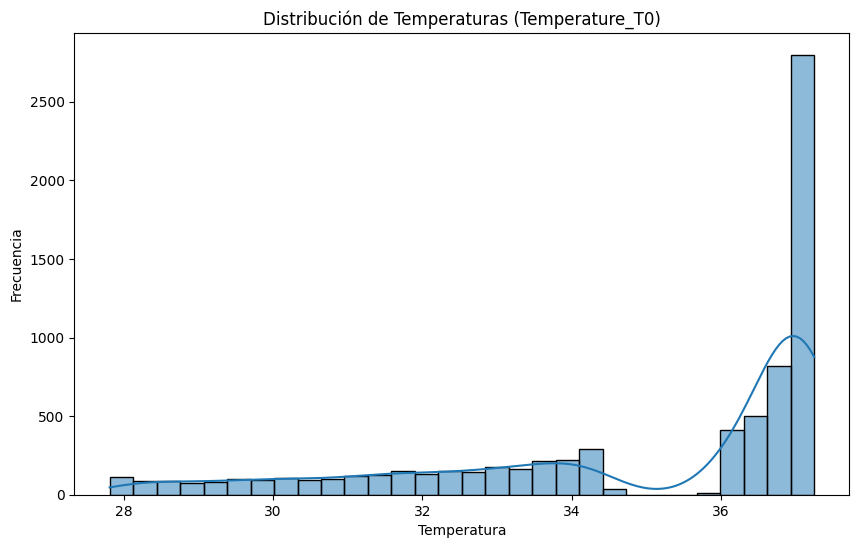

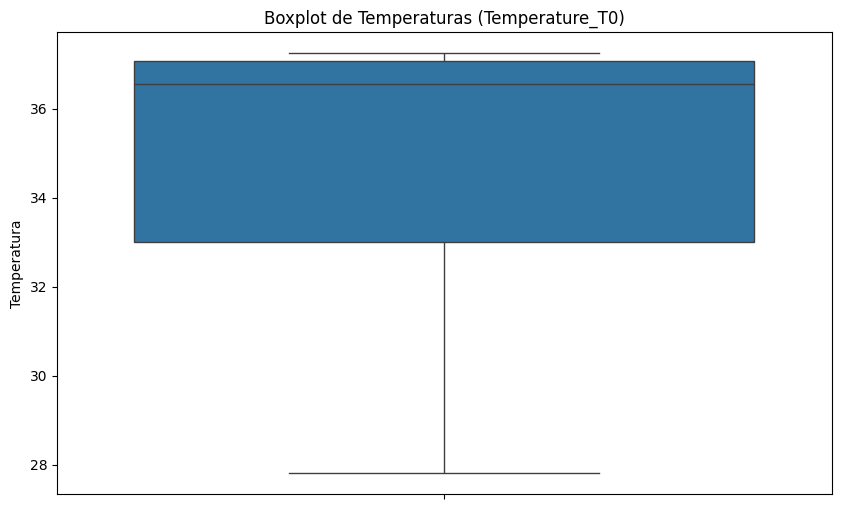

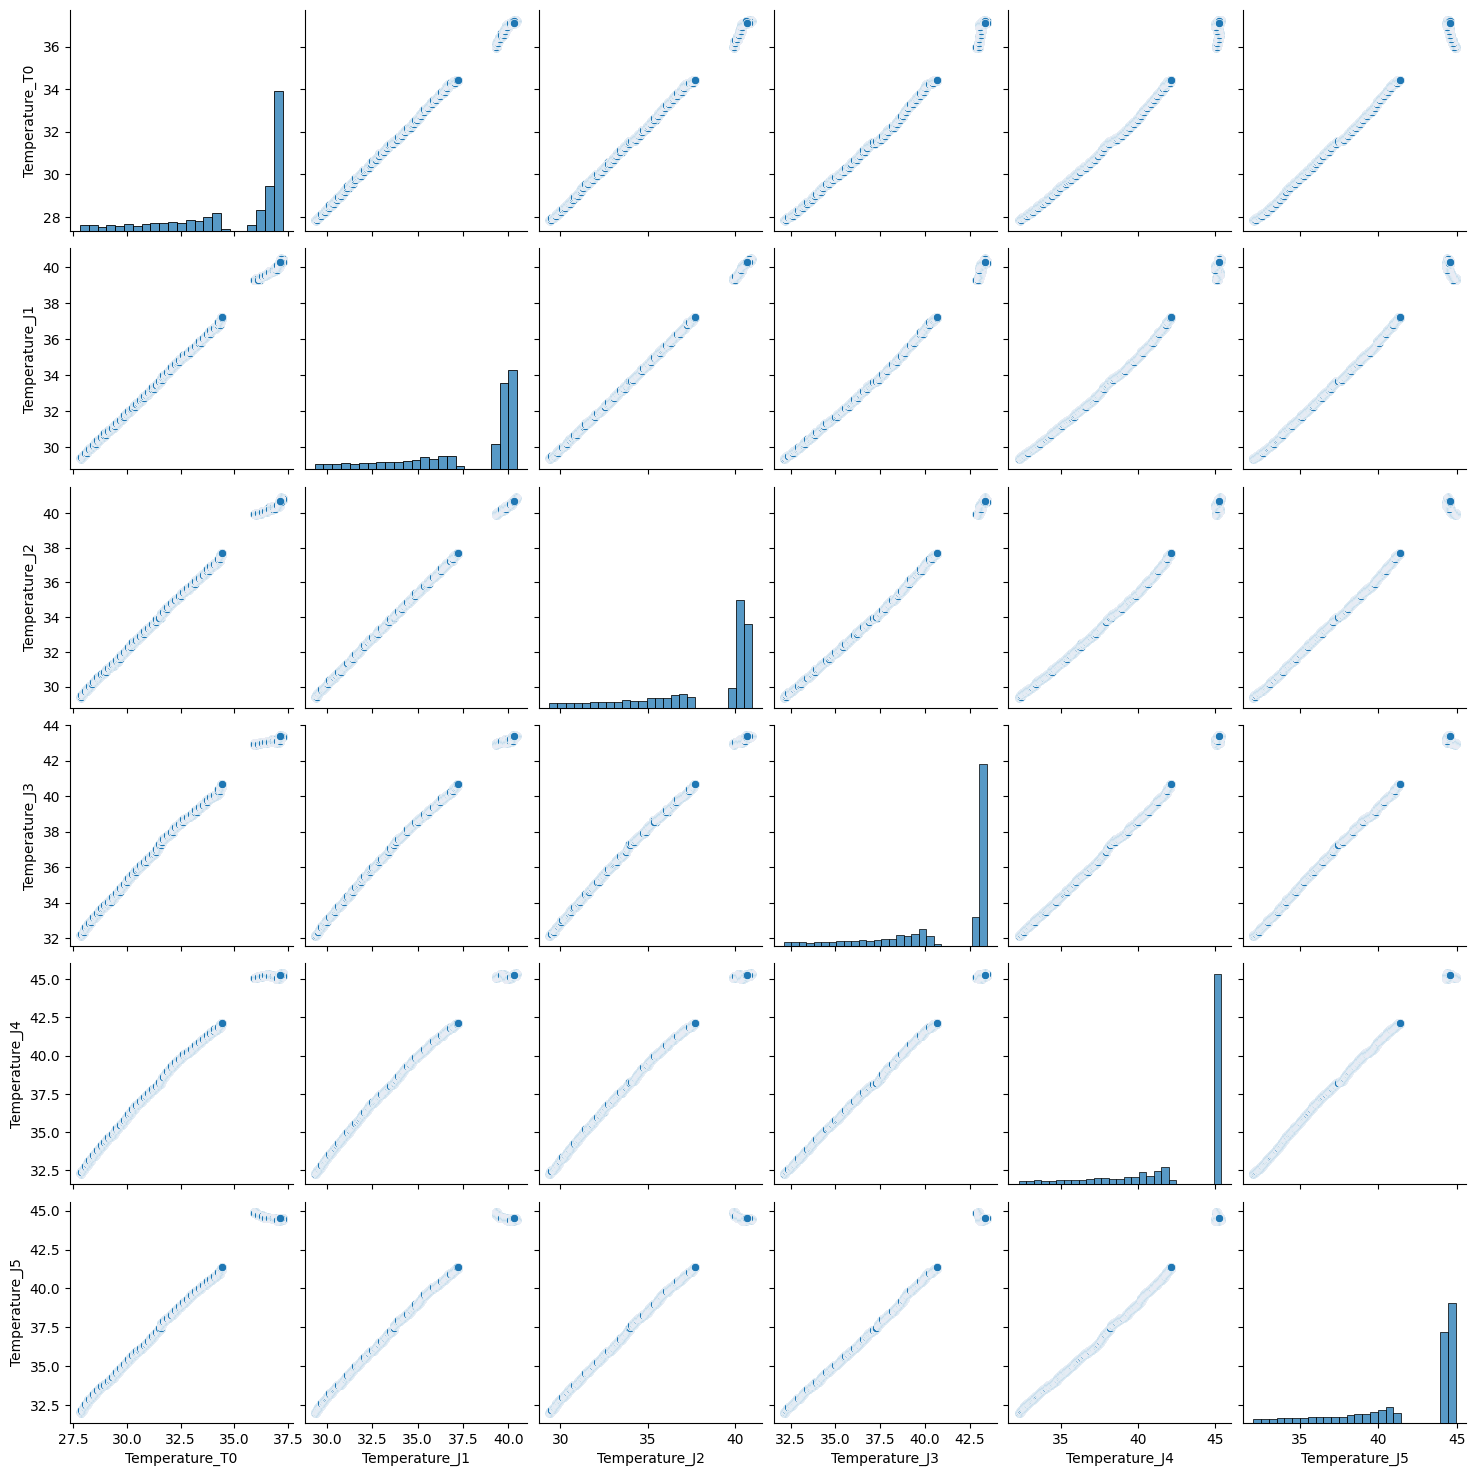

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular estadísticas descriptivas
descriptive_stats = df[['Temperature_T0', 'Temperature_J1', 'Temperature_J2', 'Temperature_J3', 'Temperature_J4', 'Temperature_J5']].describe()
print(descriptive_stats)

# Visualización de la distribución de temperaturas
plt.figure(figsize=(10, 6))
sns.histplot(df['Temperature_T0'], bins=30, kde=True)
plt.title('Distribución de Temperaturas (Temperature_T0)')
plt.xlabel('Temperatura')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de boxplot de temperaturas
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Temperature_T0'])
plt.title('Boxplot de Temperaturas (Temperature_T0)')
plt.ylabel('Temperatura')
plt.show()

# Visualización de pairplot de temperaturas
sns.pairplot(df[['Temperature_T0', 'Temperature_J1', 'Temperature_J2', 'Temperature_J3', 'Temperature_J4', 'Temperature_J5']])
plt.show()


In [61]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

# Inicializar la aplicación Dash
app = dash.Dash(__name__)

# Crear gráficos
fig1 = px.histogram(df, x='Temperature_T0', nbins=30, title='Distribución de Temperaturas (Temperature_T0)')
fig2 = px.box(df, y='Temperature_T0', title='Boxplot de Temperaturas (Temperature_T0)')
fig3 = px.scatter(df, x=df.index, y='Temperature_T0', title='Temperaturas a lo largo del tiempo (Temperature_T0)')
fig4 = px.line(df, x=df.index, y='Temperature_T0', title='Línea de tiempo de Temperaturas (Temperature_T0)')

# Layout de la aplicación
app.layout = html.Div(children=[
    html.H1(children='Dashboard de Temperaturas'),

    dcc.Graph(
        id='histogram',
        figure=fig1
    ),
    
    dcc.Graph(
        id='boxplot',
        figure=fig2
    ),

    dcc.Graph(
        id='scatter',
        figure=fig3
    ),
    
    dcc.Graph(
        id='line',
        figure=fig4
    ),

    html.Label('Slider para temperatura:'),
    dcc.RangeSlider(
        id='temperature_slider',
        min=df['Temperature_T0'].min(),
        max=df['Temperature_T0'].max(),
        value=[df['Temperature_T0'].min(), df['Temperature_T0'].max()]
    )
])

# Callbacks para interactividad
@app.callback(
    Output('scatter', 'figure'),
    [Input('temperature_slider', 'value')])
def update_scatter(slider_range):
    low, high = slider_range
    filtered_df = df[(df['Temperature_T0'] >= low) & (df['Temperature_T0'] <= high)]
    fig = px.scatter(filtered_df, x=filtered_df.index, y='Temperature_T0')
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Asumimos que queremos predecir temperaturas futuras basadas en el timestamp
df['timestamp'] = df.index.map(pd.Timestamp.timestamp)
X = df[['timestamp']]
y = df['Temperature_T0']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir y calcular el error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 1.2618827522292149
